# Отбор нужных данных

In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats as st
import numpy as np

In [2]:
vw_golf = pd.read_csv('vw.csv')

In [3]:
vw_golf = vw_golf[(vw_golf['model'] == ' Golf') & (vw_golf['transmission'] == 'Automatic') & (vw_golf['fuelType'] == 'Petrol')]

In [4]:
vw_golf

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
734,Golf,2019,36000,Automatic,4000,Petrol,145,32.8,2.0
735,Golf,2015,19390,Automatic,20031,Petrol,200,40.4,2.0
736,Golf,2019,16290,Automatic,14821,Petrol,145,44.8,1.0
737,Golf,2017,16491,Automatic,20693,Petrol,20,60.1,1.4
738,Golf,2019,16119,Automatic,14882,Petrol,145,44.8,1.0
...,...,...,...,...,...,...,...,...,...
5570,Golf,2019,28999,Automatic,3972,Petrol,150,32.8,2.0
5576,Golf,2019,28999,Automatic,1201,Petrol,145,32.8,2.0
5579,Golf,2019,28999,Automatic,1000,Petrol,145,32.8,2.0
5590,Golf,2019,18950,Automatic,1591,Petrol,145,44.8,1.5


In [5]:
vw_golf['age'] = 2020 - vw_golf['year']

In [6]:
vw_golf

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,age
734,Golf,2019,36000,Automatic,4000,Petrol,145,32.8,2.0,1
735,Golf,2015,19390,Automatic,20031,Petrol,200,40.4,2.0,5
736,Golf,2019,16290,Automatic,14821,Petrol,145,44.8,1.0,1
737,Golf,2017,16491,Automatic,20693,Petrol,20,60.1,1.4,3
738,Golf,2019,16119,Automatic,14882,Petrol,145,44.8,1.0,1
...,...,...,...,...,...,...,...,...,...,...
5570,Golf,2019,28999,Automatic,3972,Petrol,150,32.8,2.0,1
5576,Golf,2019,28999,Automatic,1201,Petrol,145,32.8,2.0,1
5579,Golf,2019,28999,Automatic,1000,Petrol,145,32.8,2.0,1
5590,Golf,2019,18950,Automatic,1591,Petrol,145,44.8,1.5,1


# VW Golf с бензиновым двигателем и автоматической коробкой передач на вторичном рынке (не из салона) разных возрастов и пробегов

In [7]:
vw_golf = vw_golf[['age', 'price', 'mileage']]

In [8]:
vw_golf

,age,price,mileage
734,1,36000,4000
735,5,19390,20031
736,1,16290,14821
737,3,16491,20693
738,1,16119,14882
...,...,...,...
5570,1,28999,3972
5576,1,28999,1201
5579,1,28999,1000
5590,1,18950,1591


Цена в фунтах, пробег в милях, возраст в годах

Все возраста из выборки

In [9]:
sorted(vw_golf['age'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11]

# Исследуем выборки по возрастам

## Машины возрастом до 1 года (age = 0)

In [10]:
vw_golf[vw_golf['age'] == 0]

,age,price,mileage
3321,0,33980,9918
4350,0,30999,1425
4561,0,32442,6530
4567,0,27989,8256
4569,0,31989,2756
4570,0,33792,156
4846,0,24500,1000
4945,0,24450,1000
4967,0,39950,1000
4985,0,28640,100


Количество элементов выборки, выборочное среднее, дисперсия и средне квадратичное отклонение цены и пробега

In [11]:
len(vw_golf[vw_golf['age'] == 0])

20

Цена

In [12]:
vw_golf[vw_golf['age'] == 0]['price'].mean()

28584.0

In [13]:
vw_golf[vw_golf['age'] == 0]['price'].var()

24710709.05263158

In [14]:
vw_golf[vw_golf['age'] == 0]['price'].var()**(1/2)

4970.986728269507

Пробег

In [15]:
vw_golf[vw_golf['age'] == 0]['mileage'].mean()

2196.7

In [16]:
vw_golf[vw_golf['age'] == 0]['mileage'].var()

8138534.11578947

In [17]:
vw_golf[vw_golf['age'] == 0]['mileage'].var()**(1/2)

2852.8116158957064

## Машины возрастом от 1 года до 2 лет (age = 1)

In [18]:
age = 1

In [19]:
vw_golf[vw_golf['age'] == age]

,age,price,mileage
734,1,36000,4000
736,1,16290,14821
738,1,16119,14882
740,1,27000,12322
741,1,26000,2859
...,...,...,...
5569,1,28999,3369
5570,1,28999,3972
5576,1,28999,1201
5579,1,28999,1000


Количество элементов выборки, выборочное среднее, дисперсия и средне квадратичное отклонение цены и пробега

In [20]:
len(vw_golf[vw_golf['age'] == age])

185

Цена

In [21]:
vw_golf[vw_golf['age'] == age]['price'].mean()

24761.686486486487

In [22]:
vw_golf[vw_golf['age'] == age]['price'].var()

31906463.2598707

In [23]:
vw_golf[vw_golf['age'] == age]['price'].var()**(1/2)

5648.580641176215

Пробег

In [24]:
vw_golf[vw_golf['age'] == age]['mileage'].mean()

7353.8378378378375

In [25]:
vw_golf[vw_golf['age'] == age]['mileage'].var()

21481230.0713866

In [26]:
vw_golf[vw_golf['age'] == age]['mileage'].var()**(1/2)

4634.784792348681

## Машины возрастом от 2 лет до 3 лет (age = 2)

In [27]:
age = 2

In [28]:
vw_golf[vw_golf['age'] == age]

,age,price,mileage
747,2,22000,10130
757,2,23799,8725
907,2,17985,6372
1822,2,25995,6000
4340,2,22000,17000
4371,2,22499,14000
4724,2,12500,33893
4763,2,21200,15432
4841,2,14299,33395
5016,2,19996,8546


Количество элементов выборки, выборочное среднее, дисперсия и средне квадратичное отклонение цены и пробега

In [29]:
len(vw_golf[vw_golf['age'] == age])

28

Цена

In [30]:
vw_golf[vw_golf['age'] == age]['price'].mean()

19843.60714285714

In [31]:
vw_golf[vw_golf['age'] == age]['price'].var()

20281844.76587302

In [32]:
vw_golf[vw_golf['age'] == age]['price'].var()**(1/2)

4503.536917343192

Пробег

In [33]:
vw_golf[vw_golf['age'] == age]['mileage'].mean()

16526.714285714286

In [34]:
vw_golf[vw_golf['age'] == age]['mileage'].var()

90806844.8042328

In [35]:
vw_golf[vw_golf['age'] == age]['mileage'].var()**(1/2)

9529.262553011791

## Машины возрастом от 3 лет до 4 лет (age = 3)

In [36]:
age = 3

In [37]:
vw_golf[vw_golf['age'] == age]

,age,price,mileage
737,3,16491,20693
1640,3,12937,18462
1976,3,23872,15435
2610,3,18490,6230
4111,3,24800,11656
4339,3,12000,27000
4380,3,16799,10100
4461,3,21990,35000
4525,3,21990,22000
4627,3,19799,13510


Количество элементов выборки, выборочное среднее, дисперсия и средне квадратичное отклонение цены и пробега

In [38]:
len(vw_golf[vw_golf['age'] == age])

28

Цена

In [39]:
vw_golf[vw_golf['age'] == age]['price'].mean()

18385.25

In [40]:
vw_golf[vw_golf['age'] == age]['price'].var()

17398266.490740743

In [41]:
vw_golf[vw_golf['age'] == age]['price'].var()**(1/2)

4171.122929229099

Пробег

In [42]:
vw_golf[vw_golf['age'] == age]['mileage'].mean()

20043.0

In [43]:
vw_golf[vw_golf['age'] == age]['mileage'].var()

81892704.5925926

In [44]:
vw_golf[vw_golf['age'] == age]['mileage'].var()**(1/2)

9049.458801088196

## Машины возрастом от 4 лет до 5 лет (age = 4)

In [45]:
age = 4

In [46]:
vw_golf[vw_golf['age'] == age]

,age,price,mileage
1950,4,13180,13733
4397,4,20400,42666
4400,4,13800,27710
4479,4,11499,40827
4501,4,18990,39000
4506,4,17549,45256
4522,4,14199,12140
4612,4,18769,14837
4614,4,18241,52943
4626,4,22999,10339


Количество элементов выборки, выборочное среднее, дисперсия и средне квадратичное отклонение цены и пробега

In [47]:
len(vw_golf[vw_golf['age'] == age])

32

Цена

In [48]:
vw_golf[vw_golf['age'] == age]['price'].mean()

17129.71875

In [49]:
vw_golf[vw_golf['age'] == age]['price'].var()

12497815.757056452

In [50]:
vw_golf[vw_golf['age'] == age]['price'].var()**(1/2)

3535.2249938379387

Пробег

In [51]:
vw_golf[vw_golf['age'] == age]['mileage'].mean()

28112.84375

In [52]:
vw_golf[vw_golf['age'] == age]['mileage'].var()

238064682.07157257

In [53]:
vw_golf[vw_golf['age'] == age]['mileage'].var()**(1/2)

15429.344836109296

## Машины возрастом от 5 лет до 6 лет (age = 5)

In [54]:
age = 5

In [55]:
vw_golf[vw_golf['age'] == age]

,age,price,mileage
735,5,19390,20031
4449,5,16990,40000
4459,5,12990,78000
4543,5,11999,19669
4634,5,17199,56354
4675,5,20000,29706
4728,5,13500,14571
4778,5,12800,10315
5008,5,15990,43200
5022,5,19790,35721


Количество элементов выборки, выборочное среднее, дисперсия и средне квадратичное отклонение цены и пробега

In [56]:
len(vw_golf[vw_golf['age'] == age])

13

Цена

In [57]:
vw_golf[vw_golf['age'] == age]['price'].mean()

15917.923076923076

In [58]:
vw_golf[vw_golf['age'] == age]['price'].var()

9989887.576923078

In [59]:
vw_golf[vw_golf['age'] == age]['price'].var()**(1/2)

3160.6783412620584

Пробег

In [60]:
vw_golf[vw_golf['age'] == age]['mileage'].mean()

34966.769230769234

In [61]:
vw_golf[vw_golf['age'] == age]['mileage'].var()

326576183.8589744

In [62]:
vw_golf[vw_golf['age'] == age]['mileage'].var()**(1/2)

18071.418977462017

# На основе этих данных можно предположить

Преобладающее количество машин на вторичном рынке имеют возраст

In [63]:
age_of_cars = {i: len(vw_golf[vw_golf['age'] == i]) for i in sorted(vw_golf['age'].unique())}
max_len = 0
max_age = -1
for age, count in age_of_cars.items():
    if count > max_len:
        max_len = count
        max_age = age
print(f'age = {max_age}')

age = 1


Можно предположить, что цена машины коррелирует не только с возрастом, но и с пробегом

# Проверим корреляцию между ценой машины и её пробегом с помощью критерия корреляции Пирсона

$H_0$ - гипотеза о том, что корреляции нет; $H_1$ - гипотеза о том, что корреляция есть

Уровень доверия

In [64]:
alpha = 0.95

Коэффициент корреляции Пирсона

In [65]:
correlation = vw_golf['price'].corr(vw_golf['mileage']) # эмпирический
correlation

-0.6197036635860743

Значение критерия при данном уровне доверия со степенями свободы = количество элементов выборки - 2

In [66]:
t_kr = abs(st.t.ppf(1 - (1 + alpha)/2, len(vw_golf) - 2))
t_kr

1.967358585322468

Проверка гипотез

In [67]:
if -t_kr < correlation < t_kr:
    print('Корреляции нет')
else:
    print('Корреляция есть')

Корреляции нет


# Построим гистограмму и график плотности цен на автомобили

<Axes: >

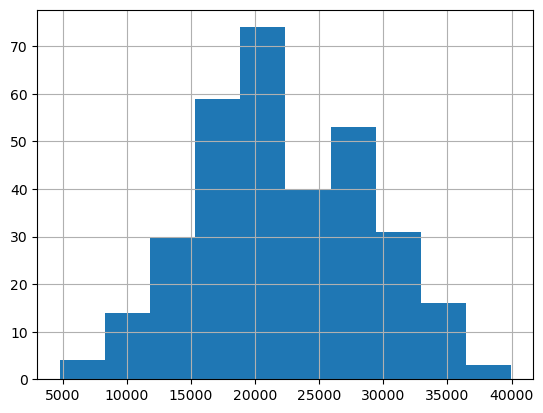

In [68]:
vw_golf['price'].hist()

<Axes: xlabel='price', ylabel='Density'>

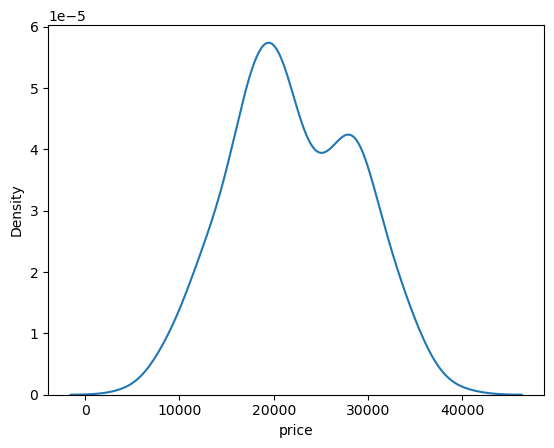

In [69]:
sns.kdeplot(data=vw_golf['price'])

Можно предположить, что цены не распределены нормально

# Проверим распределены ли цены на автомобили нормально по критерию Пирсона

In [70]:
select = vw_golf['price'].to_list()
n = len(select)
df = pd.DataFrame(select)
mx = df.mean()[0]
dx = df.var()[0]**(1/2)
alpha = 0.05

Выборочное среднее

In [71]:
mx

22104.067901234568

Выборочная дисперсия

In [72]:
dx

6696.659676666904

Количество промежутков

In [73]:
k = 1 + int(1.78 * (len(select))**(1/3))

In [74]:
k

13

Разбиение на интервалы

In [75]:
intervals = np.arange(min(select), max(select), abs(min(select) - max(select)) / k)

In [76]:
intervals

array([ 4795.        ,  7499.23076923, 10203.46153846, 12907.69230769,
       15611.92307692, 18316.15384615, 21020.38461538, 23724.61538462,
       26428.84615385, 29133.07692308, 31837.30769231, 34541.53846154,
       37245.76923077])

In [77]:
min(intervals), max(intervals)

(4795.0, 37245.769230769234)

Вычисление теоретических вероятностей

In [78]:
p = [st.norm.cdf(intervals[0], loc=mx, scale=dx) - st.norm.cdf(min(select), loc=mx, scale=dx)]
for i in range(1, len(intervals)):
    p.append(st.norm.cdf(intervals[i], loc=mx, scale=dx) - st.norm.cdf(intervals[i - 1], loc=mx, scale=dx))

In [79]:
p

[0.0,
 0.009722157078050214,
 0.02318133400416037,
 0.04705673282829204,
 0.08132485672535228,
 0.11966065751938704,
 0.1499035687277499,
 0.159885315378529,
 0.14519184032588806,
 0.11225646500728381,
 0.07389448592520786,
 0.04141310303792711,
 0.019759673782180465]

Вычисление частот

In [80]:
per = {i: 0 for i in range(len(intervals))}
for x in select:
    for i in range(len(intervals)):
        if (x < intervals[i]) or ((x - intervals[i]) < 10**-10):
            per[i] += 1
            break

In [81]:
per

{0: 1,
 1: 0,
 2: 10,
 3: 16,
 4: 23,
 5: 51,
 6: 59,
 7: 33,
 8: 33,
 9: 47,
 10: 23,
 11: 21,
 12: 6}

In [82]:
len(intervals)

13

Объединение интервалов

In [83]:
for i in range(len(intervals)):
    if n * p[i] < 5:
        if i == 0:
            intervals[i] = 0
        elif i + 1 == len(intervals):
            intervals[i - 1] = 0
        else:
            min_per = list(per.values()).index(min(per[i - 1], per[i + 1]))
            if min_per < i:
                intervals[i - 1] = 0
            else:
                intervals[i] = 0

In [84]:
intervals

array([    0.        ,  7499.23076923, 10203.46153846, 12907.69230769,
       15611.92307692, 18316.15384615, 21020.38461538, 23724.61538462,
       26428.84615385, 29133.07692308, 31837.30769231, 34541.53846154,
       37245.76923077])

In [85]:
intervals = np.delete(intervals, np.where(intervals == 0))
intervals

array([ 7499.23076923, 10203.46153846, 12907.69230769, 15611.92307692,
       18316.15384615, 21020.38461538, 23724.61538462, 26428.84615385,
       29133.07692308, 31837.30769231, 34541.53846154, 37245.76923077])

Вычисление новых частот и теоретических вероятностей

In [86]:
per = {i + 1: 0 for i in range(len(intervals))}
for x in select:
    for i in range(len(intervals)):
        if (x < intervals[i]) or ((x - intervals[i]) < 10**-10):
            per[i + 1] += 1
            break

In [87]:
per

{1: 1,
 2: 10,
 3: 16,
 4: 23,
 5: 51,
 6: 59,
 7: 33,
 8: 33,
 9: 47,
 10: 23,
 11: 21,
 12: 6}

In [88]:
p = [st.norm.cdf(intervals[0], loc=mx, scale=dx) - st.norm.cdf(min(select), loc=mx, scale=dx)]
for i in range(1, len(intervals)):
    p.append(st.norm.cdf(intervals[i], loc=mx, scale=dx) - st.norm.cdf(intervals[i - 1], loc=mx, scale=dx))

In [89]:
p

[0.009722157078050214,
 0.02318133400416037,
 0.04705673282829204,
 0.08132485672535228,
 0.11966065751938704,
 0.1499035687277499,
 0.159885315378529,
 0.14519184032588806,
 0.11225646500728381,
 0.07389448592520786,
 0.04141310303792711,
 0.019759673782180465]

Вычисление значения критерия Пирсона

In [90]:
s = 0
for i in range(len(per)):
    if p[i] == 0:
        pz = 10**-6
        s += ((per[i + 1] - n*pz)**2) / (n * pz)
    else:
        s += ((per[i + 1] - n*p[i])**2) / (n * p[i])

In [91]:
s

27.323104764178126

Проверка гипотезы

In [92]:
chi2_alpha = st.chi2.ppf(1 - alpha, len(p) - 2 - 1)

In [93]:
chi2_alpha

16.918977604620448

In [94]:
s < chi2_alpha

False

Цены на автомобили не распределены нормально